In [1]:
%matplotlib inline

import sys,os,time
import numpy as np
import matplotlib.pyplot as plt
import cv2, pylab

FER2013_DB_PATH = '/mnt/Backup/datasets/face-emotion/fer2013/fer2013.csv'

db_txt_reader = open(FER2013_DB_PATH)
db_txt_line = db_txt_reader.readline()

db_train = dict()
db_test  = dict()


In [2]:
db_idx = 0
db_test_idx = 0

while(1):
    db_txt_line = db_txt_reader.readline()
    
    delimit_pos_0 = db_txt_line.find(',')
    delimit_pos_1 = db_txt_line.find(',',delimit_pos_0+1)
    db_set = db_txt_line[delimit_pos_1+1:-1]
    
    # training set
    if db_set == 'Training' or db_set == 'PublicTest':
        sys.stdout.write("\r"+str(db_idx)+'/')
        
        db_train[db_idx] = dict()
        # extract label
        db_label = db_txt_line[0:delimit_pos_0]
        db_train[db_idx]['label'] = int(db_label)
        # extract image
        db_img = db_txt_line[delimit_pos_0+1:delimit_pos_1]
        db_img = np.fromstring(db_img, sep=' ')
        db_train[db_idx]['img'] = np.reshape(db_img, [48,48])
        # extract set
        db_train[db_idx]['set'] = db_set
        
        db_idx += 1
        
    # test set
    elif db_set == 'PrivateTest':
#         print 'trainset ends at: ' + str(db_idx)
#         print 'testset start'
        sys.stdout.write("\r"+str(db_test_idx)+'/')
    
        db_test[db_test_idx] = dict()
        # extract label
        db_label = db_txt_line[0:delimit_pos_0]
        db_test[db_test_idx]['label'] = int(db_label)
        # extract image
        db_img = db_txt_line[delimit_pos_0+1:delimit_pos_1]
        db_img = np.fromstring(db_img, sep=' ')
        db_test[db_test_idx]['img'] = np.reshape(db_img, [48,48])
        # extract set
        db_test[db_test_idx]['set'] = db_set
        
        db_test_idx += 1
    
    else:
        print 'set generation complete'
        print 'train: ' + str(db_idx) + ', test: ' + str(db_test_idx)
        break

# saveas npy
np.save('db_dict/fer2013_train.npy', db_train)
np.save('db_dict/fer2013_test.npy', db_test)
    


3588/set generation complete
train: 32298, test: 3589


(array([   6.,   15.,   74.,  278.,  505.,  560.,  367.,  149.,   42.,    4.]),
 array([-3.7465926 , -3.02090217, -2.29521173, -1.5695213 , -0.84383086,
        -0.11814042,  0.60755001,  1.33324045,  2.05893088,  2.78462132,
         3.51031175]),
 <a list of 10 Patch objects>)

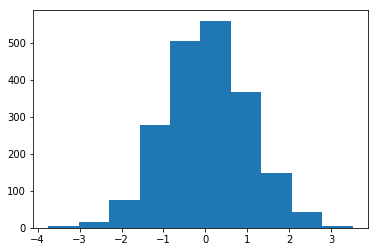

In [3]:
plt.hist(np.random.randn(2000))